### **直方图归一化**

* cv.NORM_INF 无穷范数，向量的最大值，输出结果为除以数据的最大值后将所有的数据归一化到0~1
* cv.NORM_L1 L1范数，绝对值之和，输出结果为每个灰度值所占的比例
* cv.NORM_L2 L2范数，平方和之根，输出结果为模长的归一化
* cv.NORM_MINMAX 线性归一化，max表示归一化范围的上限，min表示归一化范围的下限

In [10]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [11]:
# 对数组进行归一化
data = np.array([2.0, 8.0, 10.0])
# 绝对值求和归一化
# 在cv.NORM_MINMAX模式下，第3个参数表示归一化后的最小值，第4个参数表示归一化后的最大值
# 在其余三种模式下，第3个参数表示执行归一化后矩阵的范数，不适用第4个参数
data_L1 = cv.normalize(data, None, 1.0, 0.0, cv.NORM_L1)\
# 模长归一化
data_L2 = cv.normalize(data, None, 1.0, 0.0, cv.NORM_L2)
# 最大值归一化
data_Inf = cv.normalize(data, None, 1.0, 0.0, cv.NORM_INF)
# 线性归一化
data_MINMAX = cv.normalize(data, None, 1.0, 0.0, cv.NORM_MINMAX)

In [12]:
# 展示结果
print('绝对值求和归一化结果为\n{}'.format(data_L1))
print('模长归一化结果为\n{}'.format(data_L2))
print('最大值归一化结果为\n{}'.format(data_Inf))
print('线性归一化结果为\n{}'.format(data_MINMAX))

绝对值求和归一化结果为
[[0.1]
 [0.4]
 [0.5]]
模长归一化结果为
[[0.15430335]
 [0.6172134 ]
 [0.77151675]]
最大值归一化结果为
[[0.2]
 [0.8]
 [1. ]]
线性归一化结果为
[[0.  ]
 [0.75]
 [1.  ]]


In [13]:
# 对直方图进行归一化
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'apple.jpg')
if img is None:
    print('Failed to read apple.jpg')
    sys.exit

In [14]:
# 将图像转换为灰度图像
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# 对图像进行直方图计算
hist_item = cv.calcHist([gray_image], [0], None, [256], [0, 256])
# 对直方图进行最大值归一化
image_L1 = cv.normalize(hist_item, None, 1, 0, cv.NORM_L1)
# 对直方图进行模长归一化
image_L2 = cv.normalize(hist_item, None, 1, 0, cv.NORM_L2)
# 对直方图进行最大值归一化
image_Inf = cv.normalize(hist_item, None, 1, 0, cv.NORM_INF)
# 对直方图进行线性归一化
image_MINMAX = cv.normalize(hist_item, None, 1, 0, cv.NORM_MINMAX)

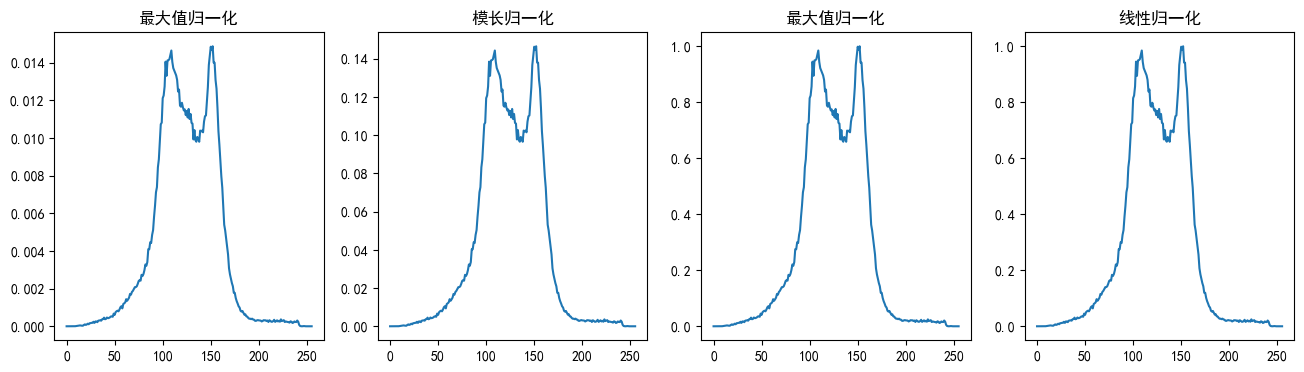

In [15]:
# 绘制直方图并展示
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.title('最大值归一化')
plt.plot(image_L1)
plt.subplot(1, 4, 2)
plt.title('模长归一化')
plt.plot(image_L2)
plt.subplot(1, 4, 3)
plt.title('最大值归一化')
plt.plot(image_Inf)
plt.subplot(1, 4, 4)
plt.title('线性归一化')
plt.plot(image_MINMAX)